# Project code for tools

## The project mainly cover 4 topics: 


```
1. Analyze the best squard for each formation in terms of all players, clubs, countries

2. Conduct comparisons between two players, two clubs or two countries, and visualized results

3. Figure out whether it is worthwile to buy a player or not through polyfit and regression

4. Find required ability for every position by Principal components analysis(PCA)
```

### At the beginning: Import all modules and dataset you need!

In [3]:
# !pip install prettytable
from prettytable import PrettyTable
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
df = pd.read_csv('CompleteDataset_modified.csv')

### Then: Select and clean data, creating new datasets to make analysis more efficiently!

```Important Notes: 
It takes long time to run the following cleaning codes! 
SO you don't have to run it. We have finished it and save two datasets in github!
```

#### The steps of cleaning are as following:

<li>Find the columns we need to use. </li>
<li>Drop the line for which has NaN </li>
<li>Use re to fix the problem that has '+','-' in the value and calculate it into int.
          Example: '10+9' --> 19; '20-9' --> 11  </li>
<li>Save the new data to 'CompleteDataset_modify.csv'</li>
<li>Remove '€' in some value, uniform the currency unit and transform value into float type.
        Example: '€ 10K' --> 10000.00; '€ 1M' --> 1000000.00   </li>
<li>Save the new data to 'CompleteDataset_modified.csv'</li>

In [ ]:
df = pd.read_csv('CompleteDataset.csv')
df.dropna(inplace = True) 
import re
name = ['special','Finishing','Attack_suport','SupplemetalDefence']
l = ['RB','LM','RM','CF','CDM','ST','LW','CM','RWB','CB','LWB','RW','CAM','LB']
variables =  ['Age',
 'Special',
 'Acceleration',
 'Aggression',
 'Agility',
 'Balance',
 'Ball control',
 'Composure',
 'Crossing',
 'Curve',
 'Dribbling',
 'Finishing',
 'Free kick accuracy',
 'Heading accuracy',
 'Interceptions',
 'Jumping',
 'Long passing',
 'Long shots',
 'Marking',
 'Penalties',
 'Positioning',
 'Reactions',
 'Short passing',
 'Shot power',
 'Sliding tackle',
 'Sprint speed',
 'Stamina',
 'Standing tackle',
 'Strength',
 'Vision',
 'Volleys']
for i in l:
    for j in df.index:
        x = df.loc[j,i]
        try:
            int(x)
        except ValueError:
            pattern1 = r'^(?P<num1>\d+)+(?P<num2>\d+)'
            flags = (
                re.IGNORECASE |  # Match against upper and lower case with one case
                re.VERBOSE  # Match with comments
                )
            match1 = re.match(pattern1, x, flags=flags)
            pattern2 = r'^(?P<num1>\d+)-(?P<num2>\d+)'
            match2 = re.match(pattern2, x, flags=flags)
            if match1:
                num1 = match1.group('num1') 
                num2 = match1.group('num2') 
                df.loc[j,i] = int(num1)+int(num2)
            if match2:
                num1 = match1.group('num1') 
                num2 = match1.group('num2') 
                df.loc[j,i] = int(num1)-int(num2)
df.to_csv('CompleteDataset_modify.csv', encoding='utf-8')

In [ ]:
d = pd.read_csv('CompleteDataset_modified.csv')
def GropFunc(ind,col,data,position):
    if position in data.loc[ind,col]:
        return position
    else:
        return False
def groupby_position(data,positions,variables):
    data_ = pd.DataFrame(np.zeros(len(variables)))
    result = data_.transpose()
    result.columns = variables
    for i in positions:
        grouped = d.groupby(lambda x:GropFunc(x,'Preferred Positions',data,i))
        result.loc[i]=grouped.mean()[variables].loc[i]
    return result
data = groupby_position(d,l,variables)

### Now, Let's go to explore our datasets! 

## < Topic 1 >  The best squard for each formation in terms of all players, clubs, countries

### Part 0:  Function formation_matrix to find the best team of a given formation in a given df.

In [12]:
df = pd.read_csv('CompleteDataset.csv')
#Common formations are listed below
# 4-3-3:a formation that consists of 4 defenders, 3 midfielders and 3 forwards
# squad_433 = ['GK', 'LB', 'CB', 'CB', 'RB', 'LM', 'CM', 'RM', 'LW', 'CF', 'RW']
# 4-2-4: a formation that consists of 4 defenders, 2 midfielders and 4 forwards.
# squard_424 = ['GK', 'LB', 'CB', 'CB', 'RB', 'LM', 'RM', 'CF', 'LW', 'CF', 'RW']
# 4-4-2: a formation that consists of 4 defenders, 4 midfielders and 2 forwards
# squard_442 = ['GK', 'LB', 'CB', 'CB', 'RB', 'RM', 'LM', 'CM', 'CM', 'CF', 'CF']
# 3-4-3: a formation that consists of 3 defenders, 4 midfielders and 3 forwards
# squard_343 = ['GK', 'CB', 'CB', 'CB', 'RM', 'LM', 'CM', 'CM', 'LW', 'CF', 'RW']
# 4-5-1: a formation that consists of 3 defenders, 4 midfielders and 3 forwards
# squard_451 = ['GK', 'LB', 'CB', 'CB', 'RB', 'RM', 'LM', 'CM', 'CM', 'CDM', 'CF']



formation_choice = {'433':('GK', 'LB', 'CB', 'CB', 'RB', 'LM', 'CM', 'RM', 'LW', 'CF', 'RW'),
                    '424':('GK', 'LB', 'CB', 'CB', 'RB', 'LM', 'RM', 'CF', 'LW', 'CF', 'RW'),
                    '442':('GK', 'LB', 'CB', 'CB', 'RB', 'RM', 'LM', 'CM', 'CM', 'CF', 'CF'),
                    '343':('GK', 'CB', 'CB', 'CB', 'RM', 'LM', 'CM', 'CM', 'LW', 'CF', 'RW'),
                    '451':('GK', 'LB', 'CB', 'CB', 'RB', 'RM', 'LM', 'CM', 'CM', 'CDM', 'CF')}

def find_player_position(i,df,result):
    formation_score = []
    for j in df.index:
        if i in df.loc[j,'Preferred Positions']:
            formation_score.append((df.loc[j,'Name'],df.loc[j,'Overall'],df.loc[j,'Nationality'],df.loc[j,'Club']))
    first = sorted(formation_score, key=lambda x:x[1],reverse = True)[0]
    for j in result:
        if j[1] == first[0]:
            first = sorted(formation_score, key=lambda x:x[1],reverse = True)[1]
    return first
def formation_matrix(df,choice):
    result = []

    dict_position = {'CB':['CB'], 'RM':['RM'], 'LM':['LM'], 'CM':['CM'], 'CF':['CF','LW','RW','ST'],
                     'LW':['LW'], 'LWB':['LWB'], 'ST':['ST'], 'RWB':['RWB'], 'LB':['LB'], 
                     'CDM':['CDM'], 'RB':['RB'], 'RW':['RW'], 'GK':['GK'], 'CAM':['CAM']}
    for i in choice:
        for j in dict_position[i]:
            try:
                first = find_player_position(j,df,result)
                break
            except:
                continue
        result.append((i,first[0],first[1],first[2],first[3]))
    return result



/Users/yahanhu/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (23,35) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Part 1:  Find the best squard formation regardless nationality and club

In [13]:
#Select a set of identical formation type
# s = ''
# for i in df.index:
#     s += ' '+df.loc[i,'Preferred Positions']
# l = s.split(' ')

#find all formation type in the dataset
#formation_type = ['CB', 'RM', 'LM', 'CM', 'CF', 'LW', 'LWB', 'ST', 'RWB', 'LB', 'CDM', 'RB', 'RW', 'GK', 'CAM']

def formation_choose():
    n = input("Please choose a formation type you are interested from the list above(eg.433,\n")
    if n in formation_choice.keys():
        choice = list(formation_choice[n])
        return choice
    else:
        print("Sorry, this formation doesn't exist")
        
def find_best_squard_formation():
    choice=formation_choose()
    formation_score = formation_matrix(df,choice)    
    a = pd.DataFrame(formation_score,columns = ['Preferred Position','Name','Overall rate','Nationality','Club'])
    a.set_index('Name') 
    return a

find_best_squard_formation()

Please choose a formation type you are interested from the list above(eg.433,
433


,Preferred Position,Name,Overall rate,Nationality,Club
0,GK,M. Neuer,92,Germany,FC Bayern Munich
1,LB,Marcelo,87,Brazil,Real Madrid CF
2,CB,Sergio Ramos,90,Spain,Real Madrid CF
3,CB,G. Chiellini,89,Italy,Juventus
4,RB,Azpilicueta,85,Spain,Chelsea
5,LM,A. Sánchez,89,Chile,Arsenal
6,CM,T. Kroos,90,Germany,Real Madrid CF
7,RM,K. De Bruyne,89,Belgium,Manchester City
8,LW,Cristiano Ronaldo,94,Portugal,Real Madrid CF
9,CF,T. Müller,86,Germany,FC Bayern Munich


### Part2: Find the best squard for a country

In [6]:
c = ''
for n in df.index:
    c += ' '+df.loc[n,'Nationality']
l1 = c.split(' ')

country_list = list(set(l1))

def country_choose():
    x = input("Choose a country you are interested in\n")
    if x in country_list:
        return x
    else:
        print("Sorry, the country you chose is not included")

def country_best_formations():
    result = {}
    x = country_choose()
    df_country = df[df['Nationality'] == x]
    for i in formation_choice.keys():
        country_formation_score = formation_matrix(df_country,formation_choice[i]) 
        result[i]=pd.DataFrame(country_formation_score,columns = ['Position','Name','Overall rate','Nationality','Club'])
    return result    

In [7]:
country_best_formations()  

Choose a country you are interested in
Brazil


{'433':    Position             Name  Overall rate Nationality                 Club
 0        GK          Ederson            83      Brazil      Manchester City
 1        LB          Marcelo            87      Brazil       Real Madrid CF
 2        CB     Thiago Silva            88      Brazil  Paris Saint-Germain
 3        CB       David Luiz            86      Brazil              Chelsea
 4        RB       Dani Alves            84      Brazil  Paris Saint-Germain
 5        LM      Alex Sandro            86      Brazil             Juventus
 6        CM      Fernandinho            82      Brazil      Manchester City
 7        RM          Willian            84      Brazil              Chelsea
 8        LW           Neymar            92      Brazil  Paris Saint-Germain
 9        CF  Roberto Firmino            83      Brazil            Liverpool
 10       RW            Lucas            82      Brazil  Paris Saint-Germain,
 '424':    Position             Name  Overall rate Nationality      

### Part3: Find the best squard for a club in different formations

In [9]:
df['Club'] = df['Club'].astype(str)
l2 = list()
for u in df.index:
    l2.append(df.loc[u,'Club'])

club_list = list(set(l2))


def club_choose():
    m = input("Choose a club you are interested in\n")
    if m in club_list:
        return m
    else:
        print("Sorry, the club you chose is not included")

def club_best_formations():
    result = {}
    m = club_choose()
    df_club = df[df['Club'] == m]
    for k in formation_choice.keys():
        club_formation_score = formation_matrix(df_club,formation_choice[k]) 
        result[k]=pd.DataFrame(club_formation_score,columns = ['Position','Name','Overall rate','Nationality','Club'])

    return result

club_best_formations()

Choose a club you are interested in
Arsenal


{'433':    Position             Name  Overall rate         Nationality     Club
 0        GK          P. Čech            86      Czech Republic  Arsenal
 1        LB     S. Kolašinac            80  Bosnia Herzegovina  Arsenal
 2        CB       S. Mustafi            84             Germany  Arsenal
 3        CB     L. Koscielny            84              France  Arsenal
 4        RB  Héctor Bellerín            81               Spain  Arsenal
 5        LM       A. Sánchez            89               Chile  Arsenal
 6        CM    Santi Cazorla            83               Spain  Arsenal
 7        RM        A. Ramsey            82               Wales  Arsenal
 8        LW        A. Ramsey            82               Wales  Arsenal
 9        CF          M. Özil            88             Germany  Arsenal
 10       RW          M. Özil            88             Germany  Arsenal,
 '424':    Position             Name  Overall rate         Nationality     Club
 0        GK          P. Čech       

## < Topic 2 > Comparisons between two players,  clubs or  countries, and visualized results

### Part1: Comparing two players' performance

In [11]:
def player_compare():
    # to read the data
    df = pd.read_csv('CompleteDataset_modified.csv')
    
    # get the players'name that users want to compare
    names = input("Enter two players' names you want to compare(seperated by ','): ")
    names = names.split(',')
    
    # to check if the player exists
    for i in names:
        if not i in df.Name.values:
            return "Sorry,the player %s doesn't exit."%i
    
    # deal with dataset and get variables from the input
    df[['Value']] = df[['Value']].astype(int)
    name1 = names[0]
    name2 = names[1]
    
    # to visualize the comparing result
    fig = plt.figure(figsize=(12,12))
    fig.suptitle('----< %s  VS.  %s >----'%(name1,name2),fontsize = 20) 
    # to divid space for two graphs
    gs = gridspec.GridSpec(2, 1, height_ratios=[1, 5]) 
        
    # 1.to draw bar graph to compare avg. age, avg overall rate, avg. potential
    df1 = df[(df['Name'] == name1)]
    value1 = df1['Value'].values[0]
    df1 = df1[['Potential','Overall','Age']]
    df1.columns = [['Potential (100)','Overall (100)','Age']]
    df1 = df1.T
    df1.reset_index(level=0, inplace=True)
    df1.columns = ['property','data']
    x = df1['property']
    y1 = df1['data'].apply(lambda x : -x)
    
    df2 = df[(df['Name'] == name2)]
    value2 = df2['Value'].values[0]
    df2 = df2[['Potential','Overall','Age']]
    df2.columns = [['Potential (100)','Overall (100)','Age']]
    df2 = df2.T
    df2.reset_index(level=0, inplace=True)
    df2.columns = ['property','data']
    y2 = df2['data']

    plt.subplot(gs[0])
    plt.barh(x, y1)
    plt.barh(x, y2)

    plt.xticks(())
    plt.xlabel('%s -Value(€):%d                %s -Value(€):%d'%(name1,value1,name2,value2),labelpad = 15, fontsize = 'xx-large')
    for x, y1, y2 in zip(x, y1, y2):
        #ha: horizontal alignmen
        #va: vertical alignment
        plt.text(y1, x, '%d' % -y1, ha='right', va = 'center', fontsize = 'x-large')  
        plt.text(y2, x, '%d' % y2 , ha='left',va = 'center', fontsize = 'x-large')

    # 2.to draw radar graph to compare avarage rates for six skills
    cols = ['Acceleration','Dribbling','Long passing','Shot power','Strength','Marking']
        # to draw a circle divided into six part equally
    angles = np.linspace(0.1 * np.pi, 2.1 * np.pi, len(cols), endpoint=False)
    angles = np.concatenate((angles, [angles[0]]))

        # initialize the graph
    plt.subplot(gs[1])
    plt.xticks(())
    plt.yticks(())
    plt.axis('off')
    ax = fig.add_subplot(212,polar=True)
        
        # draw two player's rates seperately
    df1 = df[(df['Name'] == name1)]
    stats = df1[cols].values[0].tolist()
    stats = np.concatenate((stats, [stats[0]]))
    ax.plot(angles, stats, '-', linewidth=6, c='orange', label='%s'%name1)
    ax.fill(angles, stats, c='orange', alpha=0.35)

    df2 = df[(df['Name'] == name2)]
    stats = df2[cols].values[0].tolist()
    stats = np.concatenate((stats, [stats[0]]))
    ax.plot(angles, stats, '-', linewidth=6, c='blue', label='%s'%name2)
    ax.fill(angles, stats, c='blue', alpha=0.35)

        # add lables
    ax.legend(loc=[0.25, 1.15], fontsize=16)
    ax.set_ylim(0,100)
    ax.set_thetagrids(angles * 180/np.pi, cols, fontsize=16)
    ax.grid(True)


Enter two players' names you want to compare(seperated by ','): Cristiano Ronaldo,Neymar


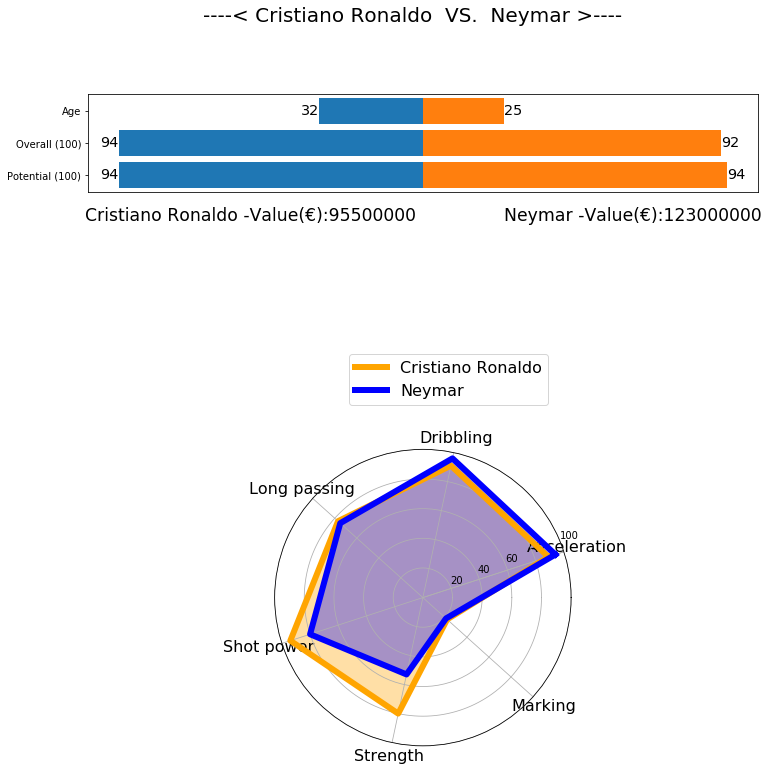

In [12]:
player_compare()

### Part 2: Comparing two clubs' performance

In [46]:
def club_formations(m):
    result = {}
    df_club = df[df['Club'] == m]
    for k in formation_choice.keys():
        club_formation_score = formation_matrix(df_club,formation_choice[k]) 
        result[k]=pd.DataFrame(club_formation_score,columns = ['Position','Name','Overall rate','Nationality','Club'])
    return result
def club_compare():  
    # to read the data
    df = pd.read_csv('CompleteDataset_modified.csv')
    
    # get the clubs'name that users want to compare
    names = input("Enter two clubs' names you want to compare(seperated by ','): ")
    names = names.split(',')
    
    # to check if the club exists
    for i in names:
        if not i in df.Club.values:
            return "Sorry,the club %s doesn't exit."%i
    
    # deal with dataset and get variables from the input
    df[['Value']] = df[['Value']].astype(int)
    df = df.groupby('Club').mean()
    df.reset_index(level=0, inplace=True)
    name1 = names[0]
    name2 = names[1]
    
    # to visualize the comparing result
    fig = plt.figure(figsize=(10,12))
    fig.suptitle('----< %s  VS.  %s >----'%(name1,name2),fontsize = 20) 
    # to divid space for two graphs
    gs = gridspec.GridSpec(2, 1, height_ratios=[1, 5]) 
    
    # 1.to draw bar graph to compare avg. age, avg overall rate, avg. potential
    df1 = df[(df['Club'] == name1)]
    value1 = df1['Value'].values[0]
    df1 = df1[['Potential','Overall','Age']]
    df1.columns = [['avg. Potential (100)','avg. Overall (100)','avg. Age']]
    df1 = df1.T
    df1.reset_index(level=0, inplace=True)
    df1.columns = ['property','data']
    x = df1['property']
    y1 = df1['data'].apply(lambda x : -x)
    
    df2 = df[(df['Club'] == name2)]
    value2 = df2['Value'].values[0]
    df2 = df2[['Potential','Overall','Age']]
    df2.columns = [['avg. Potential (100)','avg. Overall (100)','avg. Age']]
    df2 = df2.T
    df2.reset_index(level=0, inplace=True)
    df2.columns = ['property','data']
    y2 = df2['data']
    
    plt.subplot(gs[0])
    plt.barh(x, y1)
    plt.barh(x, y2)

    plt.xticks(())
    plt.xlabel('%s -Value(€):%d                %s -Value(€):%d'%(name1,value1,name2,value2),labelpad = 15, fontsize = 'xx-large')
    for x, y1, y2 in zip(x, y1, y2):
          #ha: horizontal alignmen
          #va: vertical alignment
        plt.text(y1, x, '%d' % -y1, ha='right', va = 'center', fontsize = 'x-large')  
        plt.text(y2, x, '%d' % y2 , ha='left',va = 'center', fontsize = 'x-large')
    
    # 2.to draw radar graph to compare avarage rates for six skills
    cols = ['Aggression','Ball control','Free kick accuracy','Heading accuracy','Finishing','Penalties']
        # to draw a circle divided into six part equally
    angles = np.linspace(0.1 * np.pi, 2.1 * np.pi, len(cols), endpoint=False)
    angles = np.concatenate((angles, [angles[0]]))

        # initialize the graph
    plt.subplot(gs[1])
    plt.xticks(())
    plt.yticks(())
    plt.axis('off')
    ax = fig.add_subplot(212,polar=True)
    
        # draw two club's rates seperately
    df1 = df[(df['Club'] == name1)]
    stats = df1[cols].values[0].tolist()
    stats = np.concatenate((stats, [stats[0]]))
    ax.plot(angles, stats, '-', linewidth=6, c='orange', label='%s'%name1)
    ax.fill(angles, stats, c='orange', alpha=0.35)

    df2 = df[(df['Club'] == name2)]
    stats = df2[cols].values[0].tolist()
    stats = np.concatenate((stats, [stats[0]]))
    ax.plot(angles, stats, '-', linewidth=6, c='blue', label='%s'%name2)
    ax.fill(angles, stats, c='blue', alpha=0.35)

        # add legends
    ax.legend(loc=[0.25, 1.15], fontsize=16)
    ax.set_ylim(0,100)
    ax.set_thetagrids(angles * 180/np.pi, cols, fontsize=16)
    ax.grid(True)

    # 3.to show different game result when two club choose different team's formation--not done yet
    result1 = club_formations(name1)
    result2 = club_formations(name2)
    
        # get the result data
    game_data = list()
    formation_choice = ['433','424','442','343','451']
    for i in formation_choice:
        rate1 = result1[i].sum()['Overall rate']
        for j in formation_choice:
            rate2 = result1[j].sum()['Overall rate']
            if rate1 > rate2:
                game = 'Win - Lose'
            elif rate1 < rate2:
                game = 'Lose - Win'
            else:
                game = 'Tie'
            game_data.append([i,rate1,game,rate2,j])  
            
        # use prettytable to put the result in a table.
    table = PrettyTable(['Formation1','Overall rate1','Predicted result','Overall rate2','Formation2'])
    for i in game_data:
        table.add_row(i)
    print('------ NOTE:  1 represent %s,'%name1,'2 represent %s ------'%name2)
    print(table)

Enter two clubs' names you want to compare(seperated by ','): Paris Saint-Germain,FC Barcelona
------ NOTE:  1 represent Paris Saint-Germain, 2 represent FC Barcelona ------
+------------+---------------+------------------+---------------+------------+
| Formation1 | Overall rate1 | Predicted result | Overall rate2 | Formation2 |
+------------+---------------+------------------+---------------+------------+
|    433     |      929      |       Tie        |      929      |    433     |
|    433     |      929      |    Win - Lose    |      927      |    424     |
|    433     |      929      |       Tie        |      929      |    442     |
|    433     |      929      |    Lose - Win    |      931      |    343     |
|    433     |      929      |    Win - Lose    |      925      |    451     |
|    424     |      927      |    Lose - Win    |      929      |    433     |
|    424     |      927      |       Tie        |      927      |    424     |
|    424     |      927      |    Lo

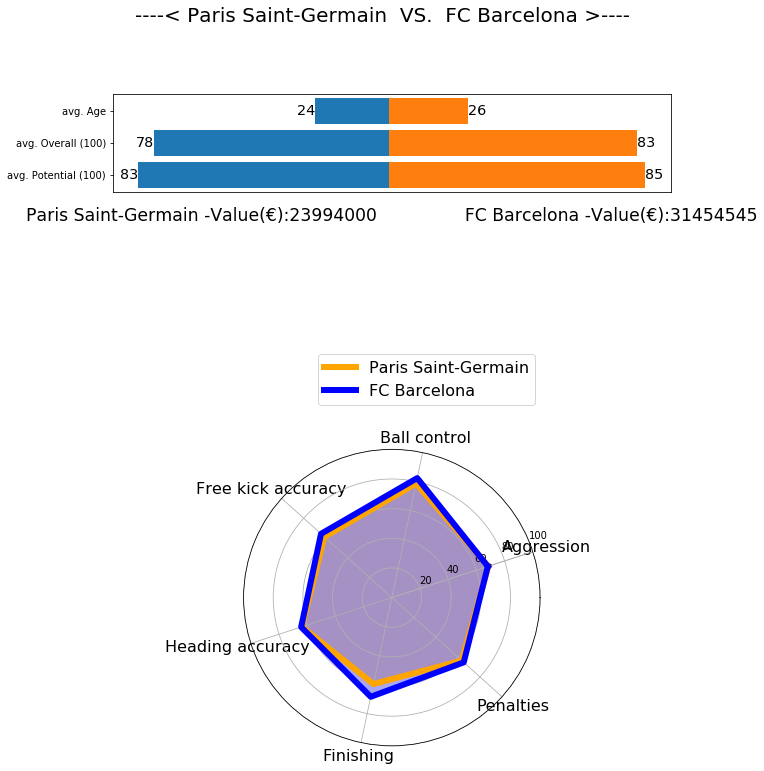

In [47]:
club_compare()

### Part3: Comparing two countries' performance

In [48]:
def country_formations(x):
    result = {}
    df_country = df[df['Nationality'] == x]
    for i in formation_choice.keys():
        country_formation_score = formation_matrix(df_country,formation_choice[i]) 
        result[i]=pd.DataFrame(country_formation_score,columns = ['Position','Name','Overall rate','Nationality','Club'])
    return result
def Nationality_compare():  
    # to read the data
    df = pd.read_csv('CompleteDataset_modified.csv')
    
    # get the clubs'name that users want to compare
    names = input("Enter two Countries' names you want to compare(seperated by ','): ")
    names = names.split(',')
    
    # to check if the club exists
    for i in names:
        if not i in df.Nationality.values:
            return "Sorry,the country %s doesn't exit."%i
    
    # deal with dataset and get variables from the input
    df[['Value']] = df[['Value']].astype(int)
    df = df.groupby('Nationality').mean()
    df.reset_index(level=0, inplace=True)
    name1 = names[0]
    name2 = names[1]
    
    # to visualize the comparing result
    fig = plt.figure(figsize=(10,12))
    fig.suptitle('----< %s  VS.  %s >----'%(name1,name2),fontsize = 20) 
    # to divid space for two graphs
    gs = gridspec.GridSpec(2, 1, height_ratios=[1, 5]) 
    
    # 1.to draw bar graph to compare avg. age, avg overall rate, avg. potential
    df1 = df[(df['Nationality'] == name1)]
    value1 = df1['Value'].values[0]
    df1 = df1[['Potential','Overall','Age']]
    df1.columns = [['avg. Potential (100)','avg. Overall (100)','avg. Age']]
    df1 = df1.T
    df1.reset_index(level=0, inplace=True)
    df1.columns = ['property','data']
    x = df1['property']
    y1 = df1['data'].apply(lambda x : -x)
    
    df2 = df[(df['Nationality'] == name2)]
    value2 = df2['Value'].values[0]
    df2 = df2[['Potential','Overall','Age']]
    df2.columns = [['avg. Potential (100)','avg. Overall (100)','avg. Age']]
    df2 = df2.T
    df2.reset_index(level=0, inplace=True)
    df2.columns = ['property','data']
    y2 = df2['data']
    
    plt.subplot(gs[0])
    plt.barh(x, y1)
    plt.barh(x, y2)

    plt.xticks(())
    plt.xlabel('%s -Value(€):%d                %s -Value(€):%d'%(name1,value1,name2,value2),labelpad = 15, fontsize = 'xx-large')
    for x, y1, y2 in zip(x, y1, y2):
          #ha: horizontal alignmen
          #va: vertical alignment
        plt.text(y1, x, '%d' % -y1, ha='right', va = 'center', fontsize = 'x-large')  
        plt.text(y2, x, '%d' % y2 , ha='left',va = 'center', fontsize = 'x-large')
    
    # 2.to draw radar graph to compare avarage rates for six skills
    cols = ['Aggression','Ball control','Free kick accuracy','Heading accuracy','Finishing','Penalties']
        # to draw a circle divided into six part equally
    angles = np.linspace(0.1 * np.pi, 2.1 * np.pi, len(cols), endpoint=False)
    angles = np.concatenate((angles, [angles[0]]))

        # initialize the graph
    plt.subplot(gs[1])
    plt.xticks(())
    plt.yticks(())
    plt.axis('off')
    ax = fig.add_subplot(212,polar=True)
    
        # draw two club's rates seperately
    df1 = df[(df['Nationality'] == name1)]
    stats = df1[cols].values[0].tolist()
    stats = np.concatenate((stats, [stats[0]]))
    ax.plot(angles, stats, '-', linewidth=6, c='orange', label='%s'%name1)
    ax.fill(angles, stats, c='orange', alpha=0.35)

    df2 = df[(df['Nationality'] == name2)]
    stats = df2[cols].values[0].tolist()
    stats = np.concatenate((stats, [stats[0]]))
    ax.plot(angles, stats, '-', linewidth=6, c='blue', label='%s'%name2)
    ax.fill(angles, stats, c='blue', alpha=0.35)

        # add lables
    ax.legend(loc=[0.25, 1.15], fontsize=16)
    ax.set_ylim(0,100)
    ax.set_thetagrids(angles * 180/np.pi, cols, fontsize=16)
    ax.grid(True)

    # 3.to show different game result when two club choose different team's formation--not done yet
    result1 = country_formations(name1)
    result2 = country_formations(name2)
    
        # get the result data
    game_data = list()
    formation_choice = ['433','424','442','343','451']
    for i in formation_choice:
        rate1 = result1[i].sum()['Overall rate']
        for j in formation_choice:
            rate2 = result1[j].sum()['Overall rate']
            if rate1 > rate2:
                game = 'Win - Lose'
            elif rate1 < rate2:
                game = 'Lose - Win'
            else:
                game = 'Tie'
            game_data.append([i,rate1,game,rate2,j])  
            
        # use prettytable to put the result in a table.
    table = PrettyTable(['Formation1','Overall rate1','Predicted result','Overall rate2','Formation2'])
    for i in game_data:
        table.add_row(i)
    print('------ NOTE:  1 represent %s,'%name1,'2 represent %s ------'%name2)
    print(table)

Enter two Countries' names you want to compare(seperated by ','): Germany,France
------ NOTE:  1 represent Germany, 2 represent France ------
+------------+---------------+------------------+---------------+------------+
| Formation1 | Overall rate1 | Predicted result | Overall rate2 | Formation2 |
+------------+---------------+------------------+---------------+------------+
|    433     |      946      |       Tie        |      946      |    433     |
|    433     |      946      |    Win - Lose    |      938      |    424     |
|    433     |      946      |    Win - Lose    |      941      |    442     |
|    433     |      946      |    Lose - Win    |      957      |    343     |
|    433     |      946      |    Win - Lose    |      944      |    451     |
|    424     |      938      |    Lose - Win    |      946      |    433     |
|    424     |      938      |       Tie        |      938      |    424     |
|    424     |      938      |    Lose - Win    |      941      |   

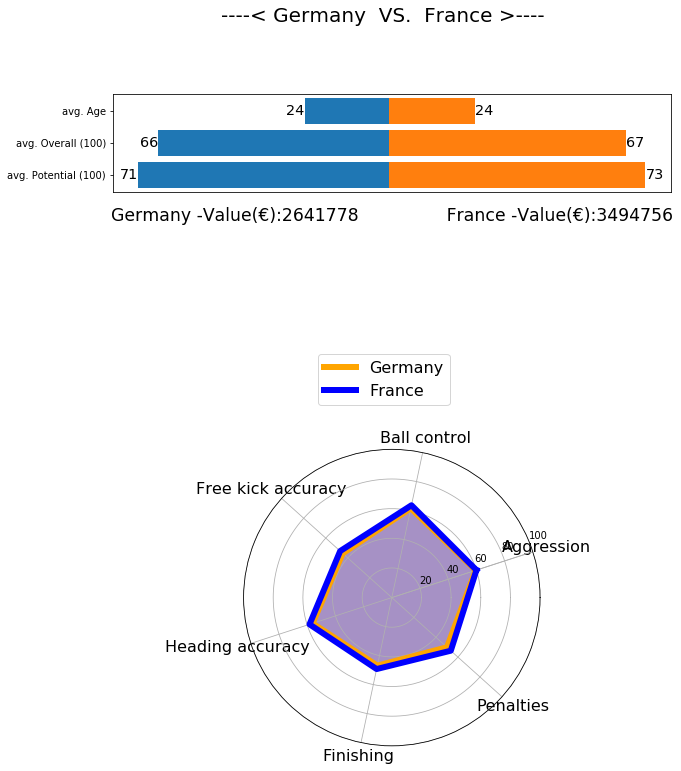

In [49]:
Nationality_compare()

## < Topic 3 > Is it worthwile to buy a player?

### Age and Score Analysis

In [4]:
def Age_Score():
    n = input("Enter the player's name you want to know")
    if n in df.Name.values:
        index = list(df['Name']).index(n)
    else:
        return f"Sorry,the player {n} doesn't exit."

    # Save all non-repeating ages in the database as a list
    Age = list(set(df['Age']))

    # Calculate the mean of overall scores of players at each age
    gr_Overall = df['Overall'].groupby(df['Age'])
    Overall_mean = gr_Overall.mean()
    gr_Potential = df['Potential'].groupby(df['Age'])
    Potential_mean = gr_Potential.mean()

    x = df.loc[index,'Age']
    y_o = df.loc[index,'Overall']
    y_p = df.loc[index,'Potential']

    # Plot the relationship of age and scores
    plt.figure(figsize=(10,6))
    plt.plot(x,y_o,'b*',label='Player Overall')
    plt.plot(x,y_p,'r*',label='Player Potential')
    plt.plot(Age,Overall_mean,label='Total Overall')
    plt.plot(Age,Potential_mean,label='Total Potential')
    plt.xlabel('Age')
    plt.ylabel('Score')
    plt.legend(loc='upper right')
    plt.title('Relationship between Age and Score')

Enter the player's name you want to knowNeymar


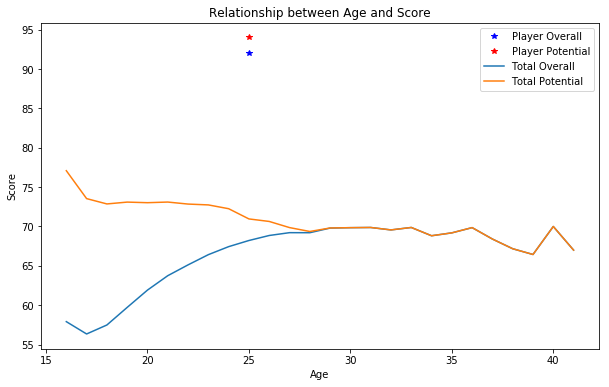

In [5]:
Age_Score()

## < Topic 4 > What's the required ability for every position?

[ 85.    97.66  98.98  99.85  99.92  99.96  99.98  99.99 100.   100.
 100.   100.   100.   100.   100.  ]


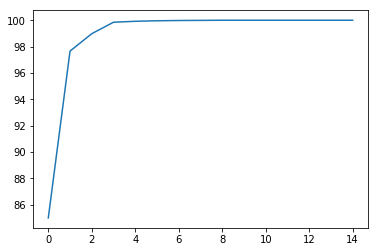

In [10]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
%matplotlib inline
#转换成数字型数组
X=data.values
#Scaling the values
X = scale(X)
pca = PCA(n_components=31)
pca.fit(X)
#每一个PC说明的方差数量
var= pca.explained_variance_ratio_
#Cumulative Variance explains
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
print(var1)
plt.plot(var1)

In [11]:
def pca(data_pca,n):
    meanVal=np.mean(data_pca,axis=0)
    newData=data_pca-meanVal
    covMat=np.cov(newData,rowvar=0)
    eigVals,eigVects=np.linalg.eig(np.mat(covMat))
    eigValIndice=np.argsort(eigVals) 
    n_eigValIndice=eigValIndice[-1:-(n+1):-1] 
    n_eigVect=eigVects[:,n_eigValIndice]
    lowDDataMat=newData.values*n_eigVect
    return n_eigVect,lowDDataMat
result,result_position = pca(data.iloc[1:],4)
result = pd.DataFrame(result,columns = name)
result_of_positions = pd.DataFrame(result_position,columns = name)
result.index = variables
result_of_positions.index = l
result_of_positions

,special,Finishing,Attack_suport,SupplemetalDefence
RB,(-22.4369010656749+0j),(-36.53672539181189+0j),(8.155966216040618+0j),(-1.4392353157360867+0j)
LM,(22.674998982524333+0j),(23.27837915576118+0j),(3.9299335330978504+0j),(3.47960444816098+0j)
RM,(14.687675392780152+0j),(23.353532672164032+0j),(4.8932132593778075+0j),(3.0866191535279617+0j)
CF,(15.591002993292404+0j),(45.22058190591776+0j),(-5.056263422557977+0j),(-1.0976093017752997+0j)
CDM,(55.49320306712614+0j),(-37.39476144893546+0j),(-19.274329200827932+0j),(-3.6624468974351596+0j)
ST,(-70.5163431652973+0j),(57.7607337553495+0j),(-5.641039448753285+0j),(-11.380012458084932+0j)
LW,(5.421884798432128+0j),(28.810524483432697+0j),(6.911891647859345+0j),(2.765984751560238+0j)
CM,(57.30341736399713+0j),(-18.494053875709554+0j),(-14.711215958409026+0j),(1.539175893975411+0j)
RWB,(25.28373839254596+0j),(-30.112384633613928+0j),(10.343606235145517+0j),(-5.455560429588173+0j)
CB,(-166.2794160752366+0j),(-36.844884414172526+0j),(-7.58457349665764+0j),(5.0271831311838815+0j)


In [12]:
data_visulization = result.astype(float)
def Change_dataframe_to_cloud_data(data):
    dics = []
    for i in data.columns:
        dic = dict()
        for j in data.index:
            if abs(data.loc[j,i])>0.1:
                dic[j] = abs(data.loc[j,i])
        dics.append(dic)
    return dics
dics = Change_dataframe_to_cloud_data(data_visulization)

/Users/yahanhu/anaconda3/lib/python3.6/site-packages/pandas/core/dtypes/cast.py:730: ComplexWarning: Casting complex values to real discards the imaginary part
  return arr.astype(dtype, copy=True)


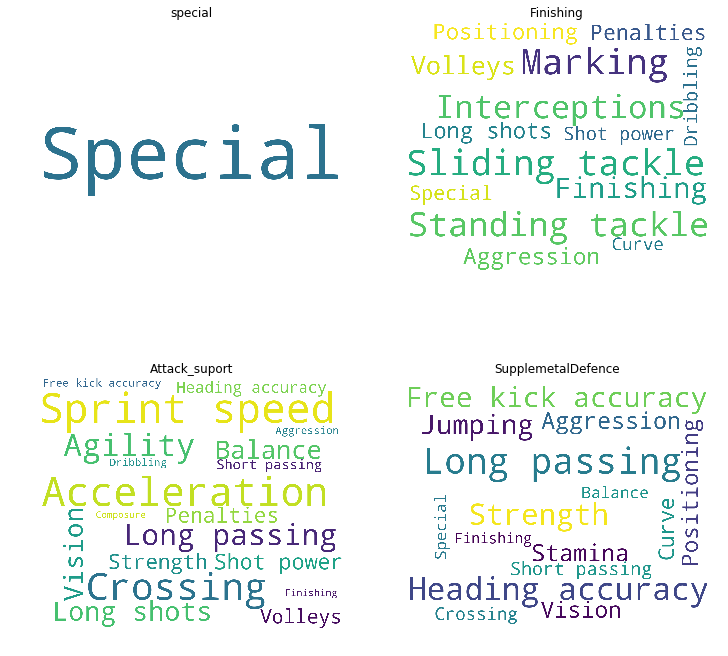

In [13]:
# #Set up side by side clouds
# COL_NUM = 2
# ROW_NUM = 2
# fig, axes = plt.subplots(ROW_NUM, COL_NUM, figsize=(12,12))
import wordcloud
def plot():
    COL_NUM = 2
    ROW_NUM = 2
    fig, axes = plt.subplots(ROW_NUM, COL_NUM, figsize=(12,12))
    for i in range(4):
        cloud = wordcloud.WordCloud(background_color='white',width=1200,height=1000,max_words=20)
        frequencies = dics[i]
        cloud.fit_words(frequencies)
    #     plt.figure(figsize=(15,15))
        ax = axes[i//2, i%2] 
        ax.set_title(name[i])
        ax.imshow(cloud)
        ax.axis('off')
#     plt.imshow(cloud) # 在坐标轴上显示图像
#     plt.axis("off") # 去除图像坐标轴
    plt.show()
plot()

/Users/yahanhu/anaconda3/lib/python3.6/site-packages/matplotlib/transforms.py:841: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.array(args, dtype=float).reshape(2, 2)


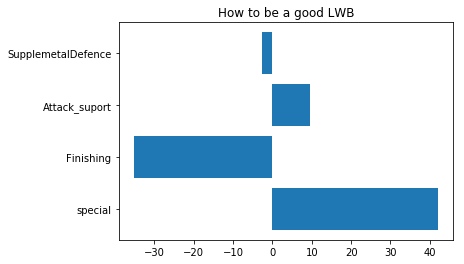

In [14]:
def show_ability_position(position):
    plt.barh( name,result_of_positions.loc[position])
    plt.title('How to be a good '+position)
show_ability_position('LWB')

In [15]:
def Collect_info_to_explain(data):
    dics = []
    for i in data.columns:
        dic_plus = dict()
        dic_minus = dict()
        for j in data.index:
            if abs(data.loc[j,i])>0.1:
                if data.loc[j,i]>0:
                    dic_plus[j] = data.loc[j,i]
                else:
                    dic_minus[j] = abs(data.loc[j,i])
        dics.append(dic_plus)
        dics.append(dic_minus)
        
    return dics
dics = Collect_info_to_explain(data_visulization)
dics

[{'Special': 0.9602758975660172},
 {},
 {'Curve': 0.10520833925877192,
  'Dribbling': 0.12146302096873385,
  'Finishing': 0.27575731620104965,
  'Long shots': 0.17091794972581145,
  'Penalties': 0.16417683549581105,
  'Positioning': 0.16881541979255554,
  'Shot power': 0.1192974265865909,
  'Volleys': 0.21629556353955845},
 {'Special': 0.1396523361374238,
  'Aggression': 0.17746716030267215,
  'Interceptions': 0.3706069874778272,
  'Marking': 0.40812168532307413,
  'Sliding tackle': 0.4130413512694003,
  'Standing tackle': 0.40387253474753704},
 {'Acceleration': 0.423950625861797,
  'Agility': 0.24751857815210046,
  'Balance': 0.1836867484972941,
  'Crossing': 0.37470966563368585,
  'Dribbling': 0.13180432070713358,
  'Sprint speed': 0.44334503860738045},
 {'Aggression': 0.13520405019563464,
  'Composure': 0.10968177546281498,
  'Finishing': 0.113889721903779,
  'Free kick accuracy': 0.13873320803312053,
  'Heading accuracy': 0.1473399615497927,
  'Long passing': 0.21999719621475464,
 

In [ ]:
import re
df = pd.read_csv('CompleteDataset_modify.csv')
# Clean data of column 'Value'
for j in df.index:
    x = df.loc[j,'Value']
    if type(x) == str:
        pattern1 = r'^(?P<currency>\D+)(?P<value>\d*\.?\d+)(?P<unit>M)'
        flags = (
            re.IGNORECASE |  # Match against upper and lower case with one case
            re.VERBOSE  # Match with comments
            )
        match1 = re.match(pattern1, x, flags=flags)
        pattern2 = r'^(?P<currency>\D+)(?P<value>\d*\.?\d+)(?P<unit>K)'
        match2 = re.match(pattern2, x, flags=flags)
        pattern3 = r'^(?P<currency>\D+)(?P<value>\d+)$'
        match3 = re.match(pattern3, x, flags=flags)
        if match1:
            value1 = match1.group('value')
            df.loc[j,'Value'] = float(value1) * 1000000
        if match2:
            value2 = match2.group('value')
            df.loc[j,'Value'] = float(value2) * 1000
        if match3:
            value3 = match3.group('value')
            df.loc[j,'Value'] = int(value3)

In [4]:
df.to_csv('CompleteDataset_modified.csv', encoding='utf-8')


0         95500000.0
1        105000000.0
2        123000000.0
3         97000000.0
4         92000000.0
5         90500000.0
6         79000000.0
7         77000000.0
8         52000000.0
9         83000000.0
10        67500000.0
11        57000000.0
12        69500000.0
13        66500000.0
14        38000000.0
15        79000000.0
16        75000000.0
17        70500000.0
18        61000000.0
19        44000000.0
20        48000000.0
21        40000000.0
22        48000000.0
23        60000000.0
24        34000000.0
25        27000000.0
26        36000000.0
27        52500000.0
28        64500000.0
29        66500000.0
            ...     
15716        30000.0
15717        70000.0
15718        60000.0
15719        60000.0
15720        60000.0
15721        60000.0
15722        60000.0
15723        50000.0
15724        50000.0
15725        40000.0
15726        60000.0
15727        70000.0
15728        60000.0
15729        50000.0
15730        50000.0
15731        60000.0
15732        

### polyfit Value-age/score

In [4]:
import numpy as np
import matplotlib.pyplot as plt
def Value():
    n = input("Enter the player's name you want to know")
    if n in df.Name.values:
        index = list(df['Name']).index(n)
    else:
        return f"Sorry,the player {n} doesn't exit." 

    gr_Age = df['Age'].groupby(df['Age'])
    Age_median = gr_Age.median()
    gr_Value1 = df['Value'].groupby(df['Age'])
    Value1_median = gr_Value1.median()
    gr_Overall = df['Overall'].groupby(df['Overall'])
    Overall_median = gr_Overall.median()
    gr_Value2 = df['Value'].groupby(df['Overall'])
    Value2_median = gr_Value2.median()
    gr_Potential = df['Potential'].groupby(df['Potential'])
    Potential_median = gr_Potential.median()
    gr_Value3 = df['Value'].groupby(df['Potential'])
    Value3_median = gr_Value3.median()


    # polyfitting
    lst_age = list(Age_median)
    lst_overall = list(Overall_median)
    lst_potential = list(Potential_median)
    lst_value1 = list(Value1_median)
    lst_value2 = list(Value2_median)
    lst_value3 = list(Value3_median)
    fa = np.polyfit(lst_age, lst_value1, 4)
    plya = np.poly1d(fa)
    fo = np.polyfit(lst_overall, lst_value2, 4)
    plyo = np.poly1d(fo)
    fp = np.polyfit(lst_potential, lst_value3, 5)
    plyp = np.poly1d(fp)

    # store polyfitting value
    vala = plya(lst_age)
    valo = plyo(lst_overall)
    valp = plyp(lst_potential) 


    # define the axis of x and y
    x_a = df.loc[index,'Age']
    x_o = df.loc[index,'Overall']
    x_p = df.loc[index,'Potential']
    y_v = int(df.loc[index,'Value'])

    # Plot the polyfitting curve
    fig = plt.figure(figsize=(8,5))
    plt.scatter(Age_median, Value1_median, label='Real Value')
    plot1 = plt.plot(Age_median, vala, 'r',label='Polyfit Curve')
    t = x_a
    ind = lst_age.index(t)
    y_a = float(list(vala)[ind])
    plt.vlines(t,-1e05,y_a, color ='#FFA500', linewidth=2.5, linestyle="--")
    plt.hlines(y_a,14,t, color ='#FFA500', linewidth=2.5, linestyle="--")
    plt.xlabel('Age')
    plt.ylabel('Value')
    plt.xlim(14, 42)
    plt.ylim(-1e05, 1.25e06)
    plt.legend(loc='best')
    plt.title('Age-Value Polyfitting')

    fig_ply = plt.figure(figsize=(12,8))
    p2 = fig_ply.add_subplot(121)
    plt.scatter(Overall_median, Value2_median, label='Real Value')
    plot2 = plt.plot(Overall_median, valo, 'r',label='polyfit curve')
    t = x_o
    ind = lst_overall.index(t)
    y_o = float(list(valo)[ind])
    plt.vlines(t,-2e06,y_o, color ='#FFA500', linewidth=2.5, linestyle="--")
    plt.hlines(y_o,40,t, color ='#FFA500', linewidth=2.5, linestyle="--")
    plt.xlabel('Overall')
    plt.ylabel('Value')
    plt.xlim(40, 100)
    plt.ylim(-2e06, 1.2e08)
    plt.legend(loc='best')
    plt.title('Overall-Value polyfitting')

    p3 = fig_ply.add_subplot(122)
    plt.scatter(Potential_median, Value3_median, label='Real Value')
    plot2 = plt.plot(Potential_median, valp, 'r',label='polyfit curve')
    t = x_p
    ind = lst_potential.index(t)
    y_p = float(list(valp)[ind])
    plt.vlines(t,-2e06,y_p, color ='#FFA500', linewidth=2.5, linestyle="--")
    plt.hlines(y_p,40,t, color ='#FFA500', linewidth=2.5, linestyle="--")
    plt.xlabel('Potential')
    plt.ylabel('Value')
    plt.xlim(40, 100)
    plt.ylim(-2e06, 1.2e08)
    plt.legend(loc='best')
    plt.title('Potential-Value polyfitting')
    plt.show()
    
    result = f'The value of layer {n} is €{y_v}'
    return result

Enter the player's name you want to knowNeymar


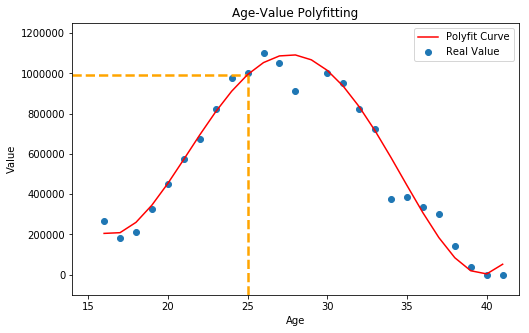

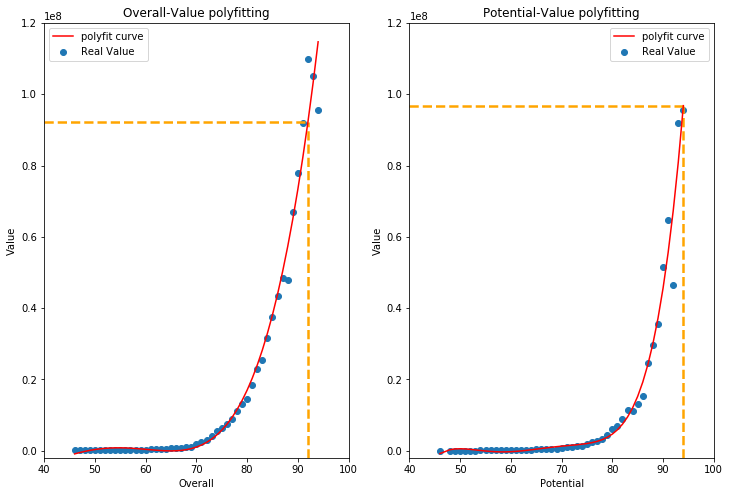

'The value of layer Neymar is €123000000'

In [7]:
Value()

### Regression

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import scale
from mpl_toolkits.mplot3d import Axes3D
def regression():
    X1 = df.Overall
    X2 = df.Potential
    X3 = df.Age
    X = pd.concat([X1,X2,X3],axis=1)
    y = df.Value
    Z = pd.concat([X,y],axis=1)

    # data scale
    Z_scaled = preprocessing.scale(Z)
    Z_scaled
    O = Z_scaled[:,0]
    P = Z_scaled[:,1]
    A = Z_scaled[:,2]
    V = Z_scaled[:,3]
    PA = np.c_[P,A]

    # determine training set and testing set
    P_train,P_test, V_train, V_test = train_test_split(P, V, random_state=1)
    A_train,A_test, V_train, V_test = train_test_split(P, V, random_state=1)
    PA_train,PA_test, V_train, V_test = train_test_split(PA, V, random_state=1)

    # regression
    rg = LinearRegression()
    model = rg.fit(PA_train,V_train)
    b = round(rg.intercept_,4) # intercept of regression equation
    k1 = round(rg.coef_[0],4)
    k2 = round(rg.coef_[1],4)

    # use testing set to predict
    V_pred = rg.predict(PA_test)

    # 3-dimensional scatter plot
    fig1=plt.figure(figsize=(12,12))
    ax=fig1.add_subplot(211,projection='3d') 
    ax.scatter(P_test,A_test,V_test,c='b',)
    ax.set_xlabel('Potential')
    ax.set_ylabel('Age')
    ax.set_zlabel('Value')
    ax.set_title('Real Scatter')

    # 3-dimensional curve surface plot of regression
    fig2=plt.figure(figsize=(12,12))
    bx=fig2.add_subplot(212,projection='3d')

    # Take the arithmetic progression of the x and y coordinates
    x = np.linspace(0,len(P_test))
    y = np.linspace(0,len(A_test)) 
    def f(x,y): # Define the function for finding the z coordinate, i.e. calculate the value of the z coordinate using the regression equation
        return rg.coef_[0] * x + rg.coef_[1] * y + rg.intercept_ 
    x,y= np.meshgrid(x,y)
    zs = np.array([f(x,y) for x,y in zip(np.ravel(x), np.ravel(y))]) # Use list comprehension to determine the list of z
    z=zs.reshape(x.shape) # Reshape z to fit the shape of x, just for plot
    bx.plot_surface(x,y,z,alpha=0.5) # plot the curve surface
    bx.set_xlabel('Potential')
    bx.set_ylabel('Age')
    bx.set_zlabel('Value')
    bx.set_title('Predict Curve')
    plt.show()
    
    # calculate the Minimum Mean Square Error
    
    sum_mean=0
    for i in range(len(V_pred)):
        sum_mean += (V_pred[i] - V_test[i]) ** 2
    sum_erro = round(np.sqrt(sum_mean / 3936),4)

    return (f'The regression equation is: y_value = {k1} x_potential + {k2} x_age {b}  with Minimum Mean Square Error: {sum_erro}')

d:\python\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.


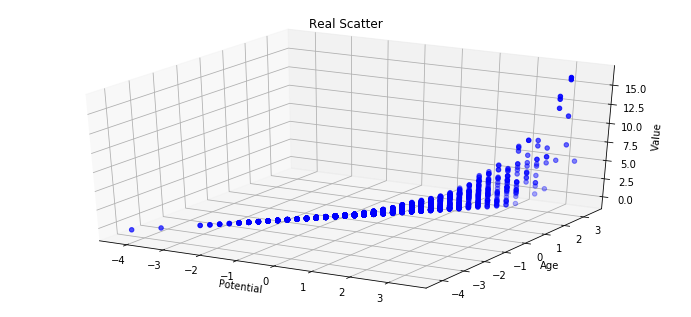

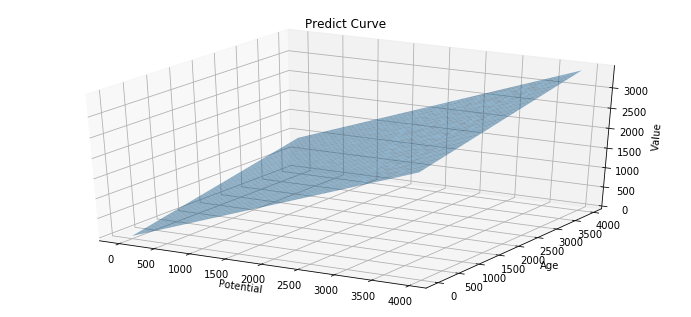

'The regression equation is: y_value = 0.6463 x_potential + 0.2336 x_age -0.0015  with Minimum Mean Square Error: 0.7829'

In [5]:
regression()